In [1]:
import numpy as np
import pandas as pd
import pydicom
%matplotlib inline
import matplotlib.pyplot as plt
from keras.models import model_from_json
import skimage.color as color
from skimage.transform import resize

Using TensorFlow backend.


In [2]:
# This function reads in a .dcm file, checks the important fields for our device, and returns a numpy array
# of just the imaging data
def check_dicom(filename): 
    # todo
    print('Load file {} ...'.format(filename))
    ds = pydicom.dcmread(filename) 
    
    #check validity
    if not (ds.BodyPartExamined=="CHEST"):
        print("Not Valid")
        return None
        
    if not (ds.PatientPosition=="AP" or ds.PatientPosition=="PA"):
        print("Not Valid")
        return None
    
    if not (ds.Modality=="DX"):
        print("Not Valid")
        return None
    
    
    img = ds.pixel_array
    print("Valid")
    return img
    
    
    
    
# This function takes the numpy array output by check_dicom and 
# runs the appropriate pre-processing needed for our model input
def preprocess_image(img,img_size): 
    # todo
    
    
    
    #img = np.resize(img, (224,224))
    
    #plt.imshow(img[0][:,:,0], cmap = 'bone')
    
    fig, axes = plt.subplots(nrows=1, ncols=1)

    #image = color.rgb2gray(img)
    image = img / 255
    img = resize(image, (224, 224), anti_aliasing=False)
    
    img = color.rgb2gray(img)
    img_proc = np.zeros((224,224,3))
    img_proc[:, :, 0] = img
    img_proc[:, :, 1] = img
    img_proc[:, :, 2] = img
    img_proc = np.resize(img_proc,(1,224,224,3))
    axes.imshow(img_proc[0][...,0], cmap='gray')
    return img_proc
    

# This function loads in our trained model w/ weights and compiles it 
def load_model(model_path, weight_path):
    # todo
    jfile = open(model_path, 'r')
    loaded = jfile.read()
    jfile.close()
    model = model_from_json(loaded)
    model.load_weights(weight_path)
    return model
    

# This function uses our device's threshold parameters to predict whether or not
# the image shows the presence of pneumonia using our trained model
def predict_image(model, img, thresh): 
    # todo    
    pred = model.predict(img, batch_size = 1, verbose = True)
    print(pred)
    if pred > thresh:
        prediction = "Positive for Pneumonia"
    else:
        prediction = "Negative for Pneumonia"
        
    return prediction 

Load file test1.dcm ...
Valid
1/1 [==============================] - 1s 1s/step
[[0.27370977]]
Negative for Pneumonia
Load file test2.dcm ...
Valid
1/1 [==============================] - 1s 1s/step
[[0.28644758]]
Negative for Pneumonia
Load file test3.dcm ...
Valid
1/1 [==============================] - 1s 1s/step
[[0.5969974]]
Positive for Pneumonia
Load file test4.dcm ...
Not Valid
Load file test5.dcm ...
Not Valid
Load file test6.dcm ...
Not Valid


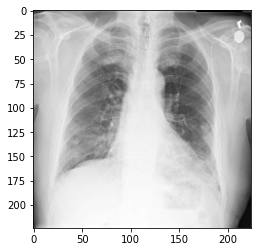

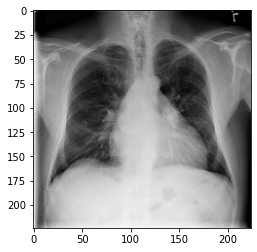

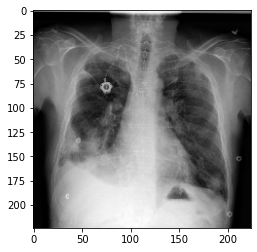

In [3]:
test_dicoms = ['test1.dcm','test2.dcm','test3.dcm','test4.dcm','test5.dcm','test6.dcm']

model_path = "my_model.json"
weight_path = "xray_class_my_model.best.hdf5"

IMG_SIZE=(1,224,224,3) # This might be different if you did not use vgg16

my_model = load_model(model_path, weight_path) #loads model
thresh = 0.42039904 #loads the threshold they chose for model classification 

# use the .dcm files to test your prediction
for i in test_dicoms:
    
    img = np.array([])
    img = check_dicom(i)
    
    if img is None:
        continue
        
    img_proc = preprocess_image(img,IMG_SIZE)
    pred = predict_image(my_model,img_proc,thresh)
    print(pred)